<h1 style="text-align:center;">Kyle Zimmer</h1>

## Problem 1:
Let $G$ be a simple, acyclic graph with adjacency matrix $A$, vertices $V$, and edges, $E$. 
<br>
It can be shown that:
<br>
<br>
$$a_{i,j}^n \epsilon A^n = N$$
<br>
Where $N$ is the number of paths from $v_i$ to $v_j$, denoted $P_{i,j}=\{v_i,...,v_j\}$, of length $n$ and $a_{i,j}$ is an element of $A^n$.
<br>
<br>

Proof:
The case of $n=1$ is true by definition of the adjacency matrix.
<br>
For the case of $n=2$ we can see that:
<br>
$$a_{i,j}^2\epsilon A^2 = \sum_{k=0}^{m} {a_{i,k}a_{k,i}}$$ 
<br>
<br>
Where $m$ is the dimension of $A$.
<br>
The number of paths of length 2 between $v_i$ and $v_j$ is the number of paths of length 1 from $v_i$ to some $v_x$ multiplied by the number of paths of length 1 from $v_x$ to $v_j$. Sussinctly this is denoted:
<br>
<br>
$$ Len(P_{i,j})= \sum_{x\epsilon V}{P_{i,x}P_{x,j}}$$
<br>
This is equavalent to the definition of the multiplication of two matricies. Note that as the element $a_{i,j}$ is 1 if an edge exists between $v_i$ and $v_j$ and 0 else, the summation across $k \leq m$ will yield the number of length 2 paths from $v_i$ to $v_j$.
<br>
<br>
Assume this holds for all $2<n<k-1$. Then consider the $k$ length path, $P_{i,j}$, from $v_i$ to $v_j$. There must exist some vertex, $v_x\epsilon P_{i,j}$ that is adjacent to $v_j$. Deleting this vertex gives the $k-1$ length path $P_{i,x}$ corrisponding to the element $a_{i,x}^{k-1} \epsilon A^{k-1}$. Adding $v_j$ back is equivalent to finding the length 1 path from $v_j$ to $v_x$. Without loss of generality on $v_x$ the total number of length $k$ paths is given by $A^{k-1} A.\square$


<h2>Problem 3:</h2>
<p style="line-height:20px;">
Let $K$ be a simplicial complex and $v$ be a 0-simplex such that $v \epsilon \sigma$ and $\sigma \epsilon K$. The star of $v$ is given by:
<br>
<br>
$$St(v)=\{\sigma \epsilon K \mid v \epsilon \sigma\}$$
<br>
As $v$ is a face of itself, $v \epsilon St(v)$. Now let:
<br>
<br>
$$F=\{St(v)\} \ \forall v \epsilon K= \{\{\sigma \epsilon K \mid v \epsilon \sigma\} \ \forall v \epsilon K \}$$
<br>
as:
<br>
<br>
$$\bigcup F =\bigcup \{St(v) \} \ \forall v \epsilon K, \ \bigcup F = K.$$
<br>
The nerve, $Nrv(F)$, is given by:
<br>
<br>
$$Nrv(F) = \{X \subseteq F \mid \bigcap X \neq \varnothing \}.$$
<br>
The nerve of $F$ is an abstract simplicial complex since:
<br>
<br>
$$\bigcap X \subseteq F \neq \varnothing \implies \bigcap Y \subseteq X \neq \varnothing.$$ 
This means $Nrv(F)$ has a geometric representation.
Recall that:
<br>
<br>
$$\bigcup F = K.$$
<br>
By the Nerve Lemma, $Nrv(F)$ has same homotopy type as $\bigcup F$ and therefore $K$ is a geometric representation of $Nrv(F)$. $\square$

</p>

## Problem 5:

In [186]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools as itr
import warnings

%matplotlib inline 

# Networkx uses depreciated methods from matplotlib that I don't want to be warned about
warnings.filterwarnings("ignore")


## Test Case Initialization
k = 100  # Number of points in cloud
p_line = np.array(list(zip([x for x in range(6)], [y for y in range(5, -1, -1)])))
p_rand = 100 * np.random.rand(k, 2) - 50  # Random point coordinates x,y where -50 <= x,y <= 50

    
def RipsGraph(P,d):
    """
        Inputs: P, a set of points P ⊂ R2 given as a k × 2 numpy matrix
                d, a diameter d ≥ 0
        Output: a networkx graph which is the 1-skeleton of the Rips complex VR(P,d)
    """
    
    g = nx.Graph()
    nodes = set()
    for i,n in enumerate(P):
        g.add_node(i, pos=n, label=str(i))
        nodes.add(i)  
    # Adds an edge between nodes that are within euclidean distance d of one another
    while nodes:
        node = nodes.pop() # Ensures we don't double add edges i.e e(3,1) == e(1,3)
        for other in nodes: # Compares node to all other nodes
            x = g.node[node]["pos"][0]
            x_ = g.node[other]["pos"][0]
            y = g.node[node]["pos"][1]
            y_ = g.node[other]["pos"][1]
            dist = np.sqrt((x-x_)**2 + (y-y_)**2)  # Euclidean distance in R2
            if dist <= d:
                g.add_edge(node, other)
    return g


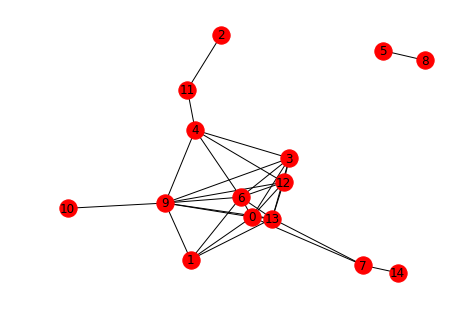

In [187]:
# Random x,y coordinates on [0,1], [0,1]
p_rand15 = np.random.rand(15,2)

# Rips Complex 1-skeleton of point cloud
g = RipsGraph(p_rand15, .3)

# Coordinates and lables of points to graph
pos = nx.get_node_attributes(g, "pos")
labels = nx.get_node_attributes(g, "label")

#Plot
nx.draw(g, pos=pos, labels=labels)
plt.show()


## Problem 6

In [188]:
def build_boundary_matrix(r_cplex):
    """
        Inputs: r_cplex, a set of sets representing the Rips Complex of a point cloud
        Outputs: The boundary matrix representing the Rips Complex
    """
    b_mat = np.zeros((len(r_cplex), len(r_cplex)))  # Initialize to zeros matrix
    
    # As nodes aren't exactly named, this orders simplicies based on dimension 0 to 3
    index_key = sorted(sorted([sorted(list(i)) for i in r_cplex]), key=len)
    for splex in r_cplex:
        if len(splex) > 1:  # Filter out all 0-simplices
            for combo in itr.combinations(splex,len(splex)-1):  # Searches for every codim=1 simplex of splex
                if set(combo) in r_cplex:
                    row = index_key.index(sorted(list(combo)))  # Find the simplex index from the key
                    col = index_key.index(sorted(list(splex)))  # Find the simplex index from the key
                    b_mat[row][col] = 1
    return b_mat
                
def RipsComplex(P, d):
    """
        Inputs: P, a set of points P ⊂ R2 given as a k × 2 numpy matrix
                d, a diameter d ≥ 0
        Output: The boundary matrix representing the 3-skeleton of VR(P,d) in numpy matrix form
    """
    
    # Builds the 1-skeleton of the Rips complex
    g = RipsGraph(P, d)
    r_cplex = set(frozenset({i}) for i in g.node)

    for node, incident_nodes in g.edge.items():
        for incident in incident_nodes:  # Incident is incident to start node
            r_cplex.add(frozenset({node, incident}))
            # Other is incident to incident. If other is incident to node then {node, incident, other} is 2-simplex
            for other in g.edge[incident]:
                if {node, incident, other} in r_cplex:  # Leaves loop if simplex already found. Avoids duplicates
                    break
                elif node in g.edge[other]:
                    r_cplex.add(frozenset({node, incident, other}))
                    # If final incident to both node and incident then {node, incident, other, final} is 3-simplex
                    for final in g.edge[other]:
                        if {node, incident, other, final} in r_cplex:  # Leave loop if simplex already found. Avoids duplicate
                            break
                        elif node in g.edge[final]:
                            r_cplex.add(frozenset({node, other, final}))  # Add bonus 2-simplex. I mean we're here already...
                            if incident in g.edge[final]:
                                r_cplex.add(frozenset({incident, other, final}))  # Add bonus 2-simplex. Might as well..
                                r_cplex.add(frozenset({node, incident, final}))  #Yet another bonus 2-simplex. Boom!
                                r_cplex.add(frozenset({node, incident, other, final}))  # Adds 3-simplex. What we were after!
    
    return build_boundary_matrix(r_cplex)
    
    

[[ 0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


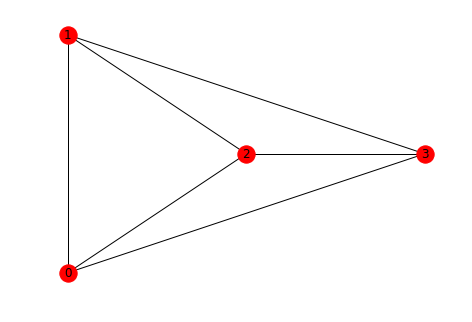

In [193]:
# Simple test case. It works!
d = 2
p_tri = [[0, 0], [0, 2], [0.5, 1], [1, 1]] #,[2, 0], [2, 2]]

g = RipsGraph(p_tri, d)
pos = nx.get_node_attributes(g,"pos")
labels = nx.get_node_attributes(g,"label")
b_mat = RipsComplex(p_tri, d)
print(b_mat)
nx.draw(g, pos=pos, labels=labels)


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


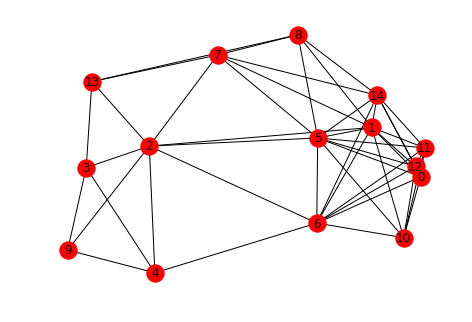

In [195]:
# Random test case from problem 5
d = .5

# Random x,y coordinates on [0,1], [0,1]
p_rand15 = np.random.rand(15,2)

# Rips Complex 1-skeleton of point cloud
g = RipsGraph(p_rand15, d)

# Coordinates and lables of points to graph
pos = nx.get_node_attributes(g, "pos")
labels = nx.get_node_attributes(g, "label")

# Boundary Matrix
b_mat = RipsComplex(p_rand15, d)
print(b_mat)

# Plot
nx.draw(g, pos=pos, labels=labels)
plt.show()


<h3>Acknowledgements</h3>
<br>
I worked with Victor Ramirez on problems 1, 3, and 5. Wikipedia was used extensively for mathematically rigorous definitions of terms relating to simplicies and simplicial complexes, including but not limited to: stars, nerves, and abstract simplicial complexes. Computational Topology: An Introduction by Herbert Edelbrunner and John L. Harer was also used for both a reference to the context of the problems as well as for definitions and examples. Problem 1 was assisted by https://math.stackexchange.com/questions/1621357/adjacency-matrix-of-a-graph-length-of-paths-proof
<br>
The Python 3 docs were also utilized.